# Ejercicio 1

Dado el conjunto de puntos que puede descargar del [siguiente enlace](https://drive.google.com/file/d/1g8KNOJsaE3jzXob-ZsTE_PqYwuxJ05pg/export?format=txt), genere un modelo de regresión multicapa que permita aproximar la tendencia del dataset.

![DiagramaElectrico](https://drive.google.com/uc?export=view&id=1a3zJAPE3DQi06LktoVoBlb91eaMHYkvv)


# Anotaciones - NO USAR LIBRERIAS DE REDES NEURONALES

Multicapa: Entonces al menos una capa oculta. 
Empezar con Perceptron monocapa para que mas o menos funcione. 
- Procesar datos -> test y training
- Definir entradas y salidas: Entradas: los x.  -> Dividir los datos entre training, validacion y test. 
- Definir capas ocultas
Podemos usar scaler pero el modelo lo armamos nosotros. 
- Inicializamos matrices de pesos y bayes. 
Pesos aleatorios entre 0 y 1, y todos los b en 0. 
Si los datos estan normalizados, los pesos tambien -> Es una recomendacion. Tambien aplica al sesgo. 
Una sola neurona. -> Una sola capa de entrada.
+ 1 capa oculta + 1 capa de salida. La capa oculta puede tener mas de una neurona. 
- Definir funciones de activacion -> Oculta Relu y salida lineal identidad
Para la primer capa oculta, elegimos la funcion de activacion -> Se recomienda usar ReLU. 
Es Fully Conected -> Cada entrada tiene su peso. 
Luego, pasa por la capa de salida, y finalmente tenemos la salida. 
- Definir la funcion de perdida
Usar L como minimos cuadrados. L(t,y) donde t es la salida deseada o dato real; e y es la salida obtenida o predicha. 
Actualizamos los w y los b. 
- back
Hay que sacar la derivada del error L con respecto a -> dL/dB1, dL/dW1, dL/dB2, dL/dW2, es decir, por cada capa derivar L con respecto a W y B

Parada por rendimiento en funcion del error. 


# Ejercicio 2

Existe una base de datos llamada MNIST que contiene imágenes de dígitos manuscritos:

problema de clasificaciòn supervisado multiclase nominal porque depende de la forma y no de un orden

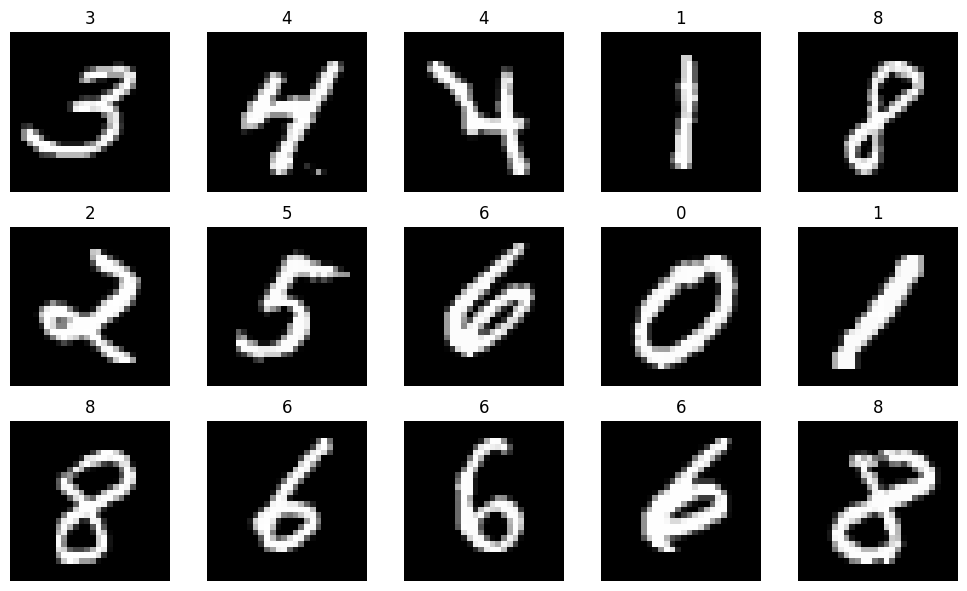

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Cargar el dataset MNIST
(X_train, y_train), (_, _) = mnist.load_data()

# Mostrar 15 ejemplos aleatorios
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ix = np.random.randint(0, len(X_train))
        img = X_train[ix]
        plt.subplot(r, c, _r*c + _c + 1)
        plt.imshow(img, cmap='gray')
        plt.axis("off")
        plt.title(y_train[ix])
plt.tight_layout()
plt.show()


Normalice las imágenes del dataset y utilice la librería `scikitlearn` para crear un modelo que permita clasificar el dataset correctamente para indicar el valor representado en cada imagen.

Las operaciones que hay que hacer para preparar el dataset son:
- Divisiòn del conjunto de datos en el set de entrenamiento y el de test
- Se hace un reshape o reordenamiento de los datos y sanitizaciòn vieno los datos que sirven y los que no
- Se normalizan los datos (se reescalan para que esten comprendidos en un intervalo deseable, como por ejemplo -1 a 1 o 0 y 1). Aca esta nuestra primer tarea que es la de investigar los distintos escaler de la libreria de scikit learn para ver cual es el mejor que podriamos utilizar. La normalización se hace sobre todos los datos de los dos conjuntos. Pero el escalador se entrena solamente con el set de entrenamiento.

Puede utilizar el siguiente código para generar una matriz de confusión que permita observar el desempeño del modelo:

In [6]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

y_pred = evaluate(X_test)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in range(0,10)], columns = [i for i in range(0,10)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

NameError: name 'evaluate' is not defined

- Luego de que los datos están preparados se puede aplicar algún modelo para la clasificación de los datos, osea, para entrenar el modelo. Acá esta nuestra otra tarea, que es la de seleccionar el clasificador que vamos a utilizar.
- La matriz de confusiòn es un método de comparación o evaluación de la exactitud del modelo en donde se ponen las predicciones con los valores reales y se comparan los verdaderos, los falsos (eso de los falsos positivos, los falsos negativos, los verdaderos positivos y los verdaderos negativos). EL mapa de calor es la visualización de los resultados de esa matriz utilizando colores.

- SVM (support vector machine)
- SVC (...clasfificator)
- SVR (... regresor)

- El concepto de lote (batch) no debe entrar necesariamente en todos los métodos de machine learning, siempre aparece en las redes neuronales sin embargo.

-  El profe propuso un modelo que va a compartir y tiene un error conceptual que hay que descubrir

# Ejercicio 3

Descargue el código de [este repositorio](https://github.com/Jugarov/DinoGame), que contiene una reproducción del juego del dinosaurio de Google Chrome.

**3.1.** Modifique las funciones del archivo `NeuralNetwork.py` para crear una red neuronal multicapa fully-connected con las entradas y salidas que precise necesarias de manera que permita que el dinosaurio pueda saltar los cactus y agacharse ante los pájaros.

&emsp;&emsp;3.1.1. En la función `initialize` describa los valores iniciales de la matriz de pesos y bias que vaya a utilizar.

&emsp;&emsp;3.1.2. En la función `think` tome como argumento de la función los parámetros que necesite como entrada de la red y procese los mismos para obtener un resultado a la salida de la red. **Recuerde modificar la línea que utiliza esta función en `main.py` (línea 151)**.

&emsp;&emsp;3.1.3. En la función `act` defina qué función de activación utilizará para tomar una decisión sobre la siguiente acción del dinosaurio. Devuelva una etiqueta indicando dicha acción.

**3.2** Modifique las funciones del archivo `Genetic.py` para que, al final de cada generación (cuando todos los dinosaurios colisionan) se actualicen los pesos y biases de las matrices de la red neuronal usando un algoritmo genético.

La población será el número de dinosaurios que estén funcionando a la vez. Como función de evaluación, use la propiedad `score` de cada uno de los individuos.

&emsp;&emsp;3.2.1. La función `updateNetwork` recibe un vector de elementos de la clase `Dinosaur`. Esta función debe encargarse de aplicar una función de selección a cada individuo, seleccionarlos, cruzar los valores de las matrices y aplicar un mecanismo de mutación para generar la nueva población. Una vez generada la nueva población, **sustituya la matriz de cada individuo del vector `poblacion` que se usa en la entrada por el elemento correspondiente de la población evolucionada**. Solo así se verá afectado el comportamiento de los dinosaurios en sucesivas iteraciones.

&emsp;&emsp;3.2.2. La función `select_fittest` recibe el mismo vector que la función `updateNetwork` y debe ser capaz de analizar la propiedad `score` de cada individuo para formar parejas. Se sugiere que esta función devuelva como resultado los índices de los elementos seleccionados.

&emsp;&emsp;3.2.3. La función `evolve` recibe como argumento los dos elementos de la clase `Dinosaur` que han sido seleccionados por la clase anterior y les aplica el mecanismo de cruce y mutación de su elección. Puede incorporar un mecanismo de elitismo si lo desea.

El objetivo del ejercicio es lograr que alguno de los dinosaurios alcance una puntuación de por lo menos 1000 puntos.

# Anotaciones Ejercicio 3
Se pueden sacar coordenadas desde el archivo del juego
Cada caracteristica va a ser una entrada -> Ejemplo: Distancia, etc. 

Capas -> Aplicacion compleja -> Al menos 2 capas ocultas
Salidas -> Saltar o agacharse o nada -> Dos salidas. Umbral para diferenciar. o 3 salidas sin umbral.
¿Que tanto influye en el rendimiento agregar una neurona mas?
Algoritmo generico con todos los paremetros de la red neuronal. 
Recomendacion -> Con elitismo. 
Entorno continuo, es aprendizaje por refuerzo. No tiene funcion error L, ni backpropagation, ni derivadas parciales. 
Porque no poseemos datos objetivos ni ideales, mis valores desean son un conjunto vacio. 


# Ejercicio 4

El juego usado en el ejercicio anterior permite capturar imágenes y guardarlas en el directorio correspondiente a la tecla que se estuviera pulsando al momento de la captura para usarlo como etiqueta de los datos. Cree una base de datos, sanitarícelos, normalícelos y utilícelos para crear un modelo de red neuronal usando la librería *Tensorflow*. En el archivo `BuildTensorflowModel.py` encontrará las herramientas necesarias para realizar este proceso.

Una vez creado el modelo, corra el juego en el modo de ejecución *automático con modelo* (modo 'a' desde el menú principal del juego) y verifique que el dinosaurio sea capaz de alcanzar nuevamente una puntuación de 1000 puntos.